# Udacity Project 4: WeRateDogs
### Data Wrangling, Analyzing and Visualization

#### Nasser Al-Nasser
##### 16 Jan 2021

In [1]:
import numpy as np
import pandas as pd
import os
import requests
import tweepy
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Twitter_Arch = pd.read_csv('twitter_archive_enhanced1.csv')
Twitter_Arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, 
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

image_predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
consumer_key = '8a0qlMpsNYGkAEvtcvvIkRWv0'
consumer_secret = 'WwWoIYkhoCZVsA9g4sK3t35eA7QMjZ0lJtUHTq2c8jNuTtzJRf'
access_token = '1254169296328155137-6K4glWiDE9AQ0tda7WdreT6Z36tSaH'
access_secret = 'm0mRqBpISOOXapGKxBgcRs0FqIdmbGcpRJNMhQpTHE2dc'

auth = tweepy.OAuthHandler('8a0qlMpsNYGkAEvtcvvIkRWv0', 'WwWoIYkhoCZVsA9g4sK3t35eA7QMjZ0lJtUHTq2c8jNuTtzJRf')
auth.set_access_token('1254169296328155137-6K4glWiDE9AQ0tda7WdreT6Z36tSaH', 'm0mRqBpISOOXapGKxBgcRs0FqIdmbGcpRJNMhQpTHE2dc')

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
tweet_ids = Twitter_Arch.tweet_id.values

with open('tweet_json.txt', 'w') as output:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
        except tweepy.TweepError:
            print('Error: tweet missing')

Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing


Rate limit reached. Sleeping for: 265


Error: tweet missing
Error: tweet missing


Rate limit reached. Sleeping for: 110


In [9]:
tweets_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:
    
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        try:
            tweets_dict['tweet_id'] = tweets_json['extended_entities']['media'][0]['id']
        except:
            tweets_dict['tweet_id'] = 'na'

        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)

In [10]:
tweets_df = pd.DataFrame(tweets_list)

# (1) twitter_archive_df

In [11]:
Twitter_Arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
Twitter_Arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
Twitter_Arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
Twitter_Arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
Twitter_Arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
print(Twitter_Arch.doggo.value_counts())
print()
print(Twitter_Arch.floofer.value_counts())
print()
print(Twitter_Arch.pupper.value_counts())
print()
print(Twitter_Arch.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64

None       2346
floofer      10
Name: floofer, dtype: int64

None      2099
pupper     257
Name: pupper, dtype: int64

None     2326
puppo      30
Name: puppo, dtype: int64


In [17]:
Twitter_Arch.retweeted_status_id.notnull().sum()

181

In [18]:
Twitter_Arch.in_reply_to_status_id.notnull().sum()

78

In [19]:
Twitter_Arch[78:181]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,512804507.0,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
79,877556246731214848,NaN,NaN,2017-06-21 15:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's both pupset and fired pup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877556246...,12,10,Penny,None,None,None,None
80,877316821321428993,NaN,NaN,2017-06-21 00:06:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dante. At first he wasn't a fan of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877316821...,13,10,Dante,None,None,None,None
81,877201837425926144,NaN,NaN,2017-06-20 16:29:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nelly. He graduated with his dogtorate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877201837...,12,10,Nelly,None,None,None,None
82,876838120628539392,NaN,NaN,2017-06-19 16:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,857746408056729600,NaN,NaN,2017-04-28 00:00:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Thor. He doesn't have finals because he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857746408...,13,10,Thor,None,None,None,None
177,857393404942143489,NaN,NaN,2017-04-27 00:38:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Instead of the usual nightly dog rate, I'm sha...",NaN,NaN,NaN,https://www.gofundme.com/meeko-needs-heart-sur...,13,10,None,None,None,None,None
178,857263160327368704,NaN,NaN,2017-04-26 16:00:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar and Oliver. Oliver shrunk Oscar....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857263160...,13,10,Oscar,None,None,None,None
179,857214891891077121,8.571567e+17,180670967.0,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [20]:
Twitter_Arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

# Quality

#### - All the values in the denonminator and numerator tha are less than 10 will be removed, because their are not useful because of their low quality.
#### - Some of the columns names will be renamed and will be illustratted after.


# Tidy

#### - 181 retweets and 78 tweet replies will be removed due to it's repettion and to make sure all of the data are tidy and have unique values.

# Cleaning For Twitter Archive 

In [21]:
twitter_arch_clean = Twitter_Arch.copy()

In [22]:
# Define
# Removing multiple cases of where the denominator of rating != 10.

# Code
twitter_arch_clean.drop(twitter_arch_clean[twitter_arch_clean.rating_denominator != 10].index, inplace = True)

In [23]:
# Test
twitter_arch_clean.rating_denominator.value_counts()


10    2333
Name: rating_denominator, dtype: int64

In [24]:
# Define
# Multiple cases of where the numerator of rating < 10. These entries will be removed.

# Code
twitter_arch_clean.drop(twitter_arch_clean[twitter_arch_clean.rating_numerator < 10].index, inplace = True)


In [25]:
#Test
twitter_arch_clean.rating_numerator.value_counts()


12      558
11      463
10      461
13      351
14       54
420       2
75        2
15        2
1776      1
666       1
182       1
27        1
26        1
17        1
Name: rating_numerator, dtype: int64

In [26]:
# Define
# Multiple cases where numerator of rating >> 10. These entries will be assessed and removed if not authentic. 

# Code 

twitter_arch_clean.rating_numerator.value_counts()


12      558
11      463
10      461
13      351
14       54
420       2
75        2
15        2
1776      1
666       1
182       1
27        1
26        1
17        1
Name: rating_numerator, dtype: int64

In [27]:
# Test

nums = [420, 1776,75,27,26,15,666,182,17]

for j in nums:
    print(f'Rating number: {j}')
    for i in range(0,len(Twitter_Arch.index)):
        if Twitter_Arch.rating_numerator[i] == j:
            print(Twitter_Arch.tweet_id[i])
            print(Twitter_Arch.text[i])
            print(Twitter_Arch.expanded_urls[i])
            print(Twitter_Arch.retweeted_status_id[i])
            print(Twitter_Arch.in_reply_to_status_id[i])
            print(Twitter_Arch.source[i])
            print(Twitter_Arch.index[i])
            print()
            print()
        else:
            pass

Rating number: 420
855862651834028034
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
nan
nan
8.558615844633518e+17
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
188


670842764863651840
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
https://twitter.com/dog_rates/status/670842764863651840/photo/1
nan
nan
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2074


Rating number: 1776
749981277374128128
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
https://twitter.com/dog_rates/status/749981277374128128/photo/1
nan
nan
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>
979


Rating number: 75
832215909146226688
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
https://twitter.com/dog_rates/statu

In [28]:
# Define
# All 5 cases appear to be genuine. However, the numerator value is incorrect for some and will be updated:
# Code 
nums = [75,27,26]
correct_vals = [9.75, 11.27, 11.26]
index_list = []

for i in nums:
    index_list.append(twitter_arch_clean[twitter_arch_clean.rating_numerator == i].index[0])

for i,j in zip(index_list,correct_vals):
    twitter_arch_clean.at[i, 'rating_numerator'] = j

In [29]:
# Test 
twitter_arch_clean.rating_numerator.value_counts()


12      558
11      465
10      461
13      351
14       54
420       2
15        2
1776      1
666       1
182       1
75        1
17        1
9         1
Name: rating_numerator, dtype: int64

In [30]:
# Define
# Rename columns with more appropriate names: "timestamp" to "tweet_timestamp", 
# "text" to "tweet_text", "rating_numerator" to "dog_rating_out_of_ten", "name" to "dog_name",
# Code
new_names = {'timestamp': 'tweet_timestamp', 'text': 'tweets',\
             'rating_numerator': 'dog_rating_out_of_ten', 'name': 'dog_name'}


twitter_arch_clean.rename(columns=new_names, inplace=True)

In [31]:
#Test
list(twitter_arch_clean.columns)


['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_timestamp',
 'source',
 'tweets',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'dog_rating_out_of_ten',
 'rating_denominator',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [32]:
# Define
# There are 181 retweets which need to be removed.
# Code
twitter_arch_clean.drop(twitter_arch_clean[twitter_arch_clean.retweeted_status_id.notnull()].index, inplace = True)


In [33]:
# Test
twitter_arch_clean.retweeted_status_id.notnull().sum()


0

In [34]:
twitter_arch_clean.in_reply_to_status_id.notnull().sum()


62

In [35]:
# Define
# Change columns "doggo", "floofer", "pupper", and "puppo" from wide to long format.
# Code
twitter_arch_clean = twitter_arch_clean.reset_index()
del twitter_arch_clean['index']

In [36]:
twitter_arch_clean['dog_category'] = 'NaN'


In [37]:
# Creating a single column for dog category

for i in range(0, len(twitter_arch_clean.index)):
    if twitter_arch_clean.loc[i, 'doggo'] == 'doggo':
        twitter_arch_clean.loc[i, 'dog_category'] = 'doggo'
    elif twitter_arch_clean.loc[i, 'floofer'] == 'floofer':
        twitter_arch_clean.loc[i, 'dog_category'] = 'floofer'
    elif twitter_arch_clean.loc[i, 'pupper'] == 'pupper':
        twitter_arch_clean.loc[i, 'dog_category'] = 'pupper'
    elif twitter_arch_clean.loc[i, 'puppo'] == 'puppo':
        twitter_arch_clean.loc[i, 'dog_category'] = 'puppo'
    else:
        twitter_arch_clean.loc[i, 'dog_category'] = 'None'

In [38]:
# Test
multi_cat_list = []

for i in range(0, len(twitter_arch_clean.index)):
    if twitter_arch_clean.doggo[i] == 'doggo' and (twitter_arch_clean.floofer[i] == 'floofer' \
                                                   or twitter_arch_clean.pupper[i] == 'pupper'\
                                                   or twitter_arch_clean.puppo[i] == 'puppo'):
        multi_cat_list.append(i)

print(multi_cat_list)
print(len(multi_cat_list))

[164, 171, 375, 434, 459, 466, 559, 584, 707, 846, 886]
11


In [39]:
twitter_arch_clean.loc[153, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]


doggo           None
floofer         None
pupper          None
puppo           None
dog_category    None
Name: 153, dtype: object

In [40]:
twitter_arch_clean.tweets[153]


"Instead of the usual nightly dog rate, I'm sharing this story with you. Meeko is 13/10 and would like your help \n\nhttps://t.co/Mj4j6QoIJk https://t.co/JdNE5oqYEV"

In [41]:
twitter_arch_clean.loc[153, 'dog_category'] = 'puppo'


In [42]:
twitter_arch_clean.loc[160, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]


doggo           None
floofer         None
pupper          None
puppo           None
dog_category    None
Name: 160, dtype: object

In [43]:
twitter_arch_clean.tweets[160]


'This is Cermet, Paesh, and Morple. They are absolute h*ckin superstars. Watered every day so they can grow. 14/10 for all https://t.co/GUefqUmZv8'

In [44]:
twitter_arch_clean.loc[160, 'dog_category'] = 'floofer'


In [45]:
twitter_arch_clean.loc[354, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]


doggo           doggo
floofer          None
pupper           None
puppo            None
dog_category    doggo
Name: 354, dtype: object

In [46]:
twitter_arch_clean.tweets[354]


"Here's a doggo who looks like he's about to give you a list of mythical ingredients to go collect for his potion. 11/10 would obey https://t.co/8SiwKDlRcl"

In [47]:
twitter_arch_clean.loc[411, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]


doggo           None
floofer         None
pupper          None
puppo           None
dog_category    None
Name: 411, dtype: object

In [48]:
twitter_arch_clean.tweets[411]


'This is Bauer. He had nothing to do with the cookies that disappeared. 13/10 very good boy https://t.co/AIMF8ouzvl'

In [49]:
twitter_arch_clean.loc[411, 'dog_category'] = 'multiple'


In [50]:
twitter_arch_clean.loc[441, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]


doggo           None
floofer         None
pupper          None
puppo           None
dog_category    None
Name: 441, dtype: object

In [51]:
twitter_arch_clean.tweets[441]


"This is Waffles. He's concerned that the dandruff shampoo he just bought is faulty. 11/10 tragic af https://t.co/BCB87qUU0h"

In [52]:
twitter_arch_clean.loc[441, 'dog_category'] = 'pupper'


In [53]:
twitter_arch_clean.loc[531, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]


doggo           None
floofer         None
pupper          None
puppo           None
dog_category    None
Name: 531, dtype: object

In [54]:
twitter_arch_clean.tweets[531]


"This is Happy. He's a bathtub reviewer. Seems to be pleased with this one. 12/10 https://t.co/Ln89R4FP7v"

In [55]:
twitter_arch_clean.loc[556, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]


doggo            None
floofer          None
pupper           None
puppo           puppo
dog_category    puppo
Name: 556, dtype: object

In [56]:
twitter_arch_clean.loc[556, 'dog_category'] = 'multiple'


In [57]:
twitter_arch_clean.loc[677, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]


doggo             None
floofer           None
pupper          pupper
puppo             None
dog_category    pupper
Name: 677, dtype: object

In [58]:
twitter_arch_clean.tweets[677]


"This is Louie. He's had a long day. Did a lot of pupper things. Also appears to be rather heckin pettable. 11/10 https://t.co/w2qDmoTIZ5"

In [59]:
twitter_arch_clean.loc[677, 'dog_category'] = 'multiple'

In [60]:
twitter_arch_clean.loc[813, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]


doggo           None
floofer         None
pupper          None
puppo           None
dog_category    None
Name: 813, dtype: object

In [61]:
twitter_arch_clean.tweets[813]


"Meet Abby. She's incredibly distracting. Just wants to help steer. Hazardous af. Still 12/10 would pet while driving https://t.co/gLbLiZtwsp"

In [62]:
twitter_arch_clean.loc[813, 'dog_category'] = 'multiple'


In [63]:
twitter_arch_clean.loc[852, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]


doggo           None
floofer         None
pupper          None
puppo           None
dog_category    None
Name: 852, dtype: object

In [64]:
twitter_arch_clean.tweets[852]


"Say hello to Rorie. She's zen af. Just enjoying a treat in the sunlight. 10/10 would immediately trade lives with https://t.co/yctnFptdQ1"

In [65]:
twitter_arch_clean.loc[852, 'dog_category'] = 'multiple'


In [66]:
twitter_arch_clean.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_timestamp,source,tweets,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,dog_rating_out_of_ten,rating_denominator,dog_name,doggo,floofer,pupper,puppo,dog_category
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None


In [67]:
twitter_arch_clean.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_timestamp,source,tweets,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,dog_rating_out_of_ten,rating_denominator,dog_name,doggo,floofer,pupper,puppo,dog_category
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None


# Summary of Arch cleaning

### - I recognized the need for removing useless coloumns as it is clear on the last cleaning step I did. 

### - Howevery others I stated before will do them.

# Image Prediction

In [68]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')


In [69]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [70]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [71]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### No Nulls

# Quality

### - Enteries that don't state any type pf dog will be removed 
### - P1, P2, and P3 will be renamed 
### - No need for the jpg_url and it will be removed

In [72]:
image_predictions.p1_dog.value_counts()


True     1532
False     543
Name: p1_dog, dtype: int64

# Cleaning Image Prediction Datat


In [73]:
image_preds_clean = image_predictions.copy()


In [74]:
# Define
# Entries where the first (i.e. most confident prediction) has a False value 
#    for "p1_dog" (i.e. does not correspond to a type of dog) will be removed. 
# Code

image_preds_clean.drop(image_preds_clean[image_preds_clean.p1_dog == False].index, inplace=True)


In [75]:
# Test

image_preds_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

In [76]:
# Define
# The "p1" and "p1_conf" columns will be renamed with more explanatory titles.
# Code
new_col_names = {'p1':'dog_breed_prediction', 'p1_conf':'prediction_confidence'}

image_preds_clean.rename(columns= new_col_names, inplace=True)

In [77]:
# Test
list(image_preds_clean.columns)


['tweet_id',
 'jpg_url',
 'img_num',
 'dog_breed_prediction',
 'prediction_confidence',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [78]:
# Define
# The column "jpg_url" will be removed since url data is already contained in the 
#    twitter archive data (expanded_urls)
# The "p2" and "p3" related columns will be removed as I am only using the most 
#    likely prediction ("p1") in my analysis
# After removal of "False" entries, the "p1_dog" column will be removed as it will no 
#    longer add any valuable information.
# Code
preds_drop_cols = ['jpg_url', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf']

image_preds_clean.drop(preds_drop_cols, inplace=True, axis=1)

In [79]:
# Test
list(image_preds_clean.columns)


['tweet_id', 'img_num', 'dog_breed_prediction', 'prediction_confidence']

In [80]:
image_preds_clean.head()

,tweet_id,img_num,dog_breed_prediction,prediction_confidence
0,666020888022790149,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,1,redbone,0.506826
2,666033412701032449,1,German_shepherd,0.596461
3,666044226329800704,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,1,miniature_pinscher,0.560311


# Tweets

In [81]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [82]:
tweets_df.head()

,tweet_id,retweet_count,favorite_count
0,892420639486877696,7415,35150
1,892177413194625024,5517,30406
2,891815175371796480,3639,22871
3,891689552724799489,7592,38441
4,891327551943041024,8166,36650


In [83]:
tweets_df.favorite_count.head()

0    35150
1    30406
2    22871
3    38441
4    36650
Name: favorite_count, dtype: int64

In [84]:
tweets_df.favorite_count.sum()

17109893

In [85]:
tweets_df.favorite_count.describe()

count      2331.000000
mean       7340.151437
std       11399.587592
min           0.000000
25%        1275.000000
50%        3186.000000
75%        8981.000000
max      151220.000000
Name: favorite_count, dtype: float64

In [86]:
tweets_df.retweet_count.head()

0    7415
1    5517
2    3639
3    7592
4    8166
Name: retweet_count, dtype: int64

In [87]:
tweets_df.retweet_count.count()

2331

In [88]:
tweets_df.retweet_count.describe()

count     2331.000000
mean      2606.012441
std       4408.896608
min          1.000000
25%        529.000000
50%       1216.000000
75%       3023.500000
max      74831.000000
Name: retweet_count, dtype: float64

In [89]:
tweets_df.head()

,tweet_id,retweet_count,favorite_count
0,892420639486877696,7415,35150
1,892177413194625024,5517,30406
2,891815175371796480,3639,22871
3,891689552724799489,7592,38441
4,891327551943041024,8166,36650


### No Nulls

# Quality 
### - Nothing will be changed.

# Data Anlysis
  ### - Data Merging 
  ### - Data Anlysis and Report

## Data Merging 

In [90]:
# Merging dataframes to create a master dataframe 1

master_df_clean = pd.merge(twitter_arch_clean, image_preds_clean, on='tweet_id',how='outer')


In [91]:
# Test
master_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_timestamp,source,tweets,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,dog_name,doggo,floofer,pupper,puppo,dog_category,img_num,dog_breed_prediction,prediction_confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10.0,Phineas,None,None,None,None,None,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10.0,Tilly,None,None,None,None,None,1.0,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10.0,Archie,None,None,None,None,None,1.0,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,10.0,Darla,None,None,None,None,None,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,10.0,Franklin,None,None,None,None,None,2.0,basset,0.555712


In [92]:
# Merging dataframes to create a master dataframe 2
master_df_clean = pd.merge(tweets_df, master_df_clean, on='tweet_id', how='outer')

In [93]:
# Test
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4347 entries, 0 to 4346
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    4347 non-null   object 
 1   retweet_count               2331 non-null   float64
 2   favorite_count              2331 non-null   float64
 3   in_reply_to_status_id       62 non-null     float64
 4   in_reply_to_user_id         62 non-null     float64
 5   tweet_timestamp             1727 non-null   object 
 6   source                      1727 non-null   object 
 7   tweets                      1727 non-null   object 
 8   retweeted_status_id         0 non-null      float64
 9   retweeted_status_user_id    0 non-null      float64
 10  retweeted_status_timestamp  0 non-null      object 
 11  expanded_urls               1682 non-null   object 
 12  dog_rating_out_of_ten       1727 non-null   float64
 13  rating_denominator          1727 

In [94]:
# Define
# Since retweets and replies will be removed, the column "retweeted_status_timestamp" will 
#        be removed as it will no longer provide any useful information.
# Remove column "rating_denominator" once all the values that != 10 have been removed since this
#    will no longer provide any useful information.
# Code
preds_drop_coles = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'img_num']

master_df_clean.drop(preds_drop_coles, inplace=True, axis=1)

In [95]:
tweets_df['tweet_id']=tweets_df['tweet_id']
master_df_clean['tweet_id']=master_df_clean['tweet_id']

In [96]:
# Saving data to csv
master_df_clean.to_csv('twitter_archive_master.csv')

In [97]:
# Test
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4347 entries, 0 to 4346
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               4347 non-null   object 
 1   retweet_count          2331 non-null   float64
 2   favorite_count         2331 non-null   float64
 3   tweet_timestamp        1727 non-null   object 
 4   source                 1727 non-null   object 
 5   tweets                 1727 non-null   object 
 6   expanded_urls          1682 non-null   object 
 7   dog_rating_out_of_ten  1727 non-null   float64
 8   rating_denominator     1727 non-null   float64
 9   dog_name               1727 non-null   object 
 10  doggo                  1727 non-null   object 
 11  floofer                1727 non-null   object 
 12  pupper                 1727 non-null   object 
 13  puppo                  1727 non-null   object 
 14  dog_category           1727 non-null   object 
 15  dog_

## Data Anlysis and Report

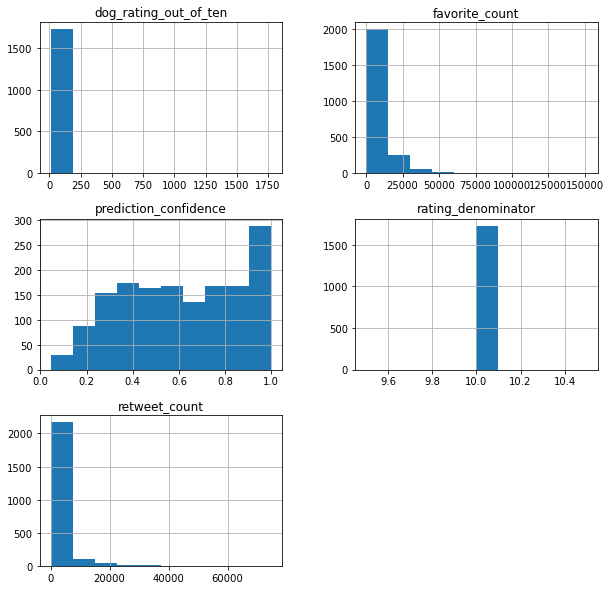

In [98]:
master_df_clean.hist(figsize=(10,10));

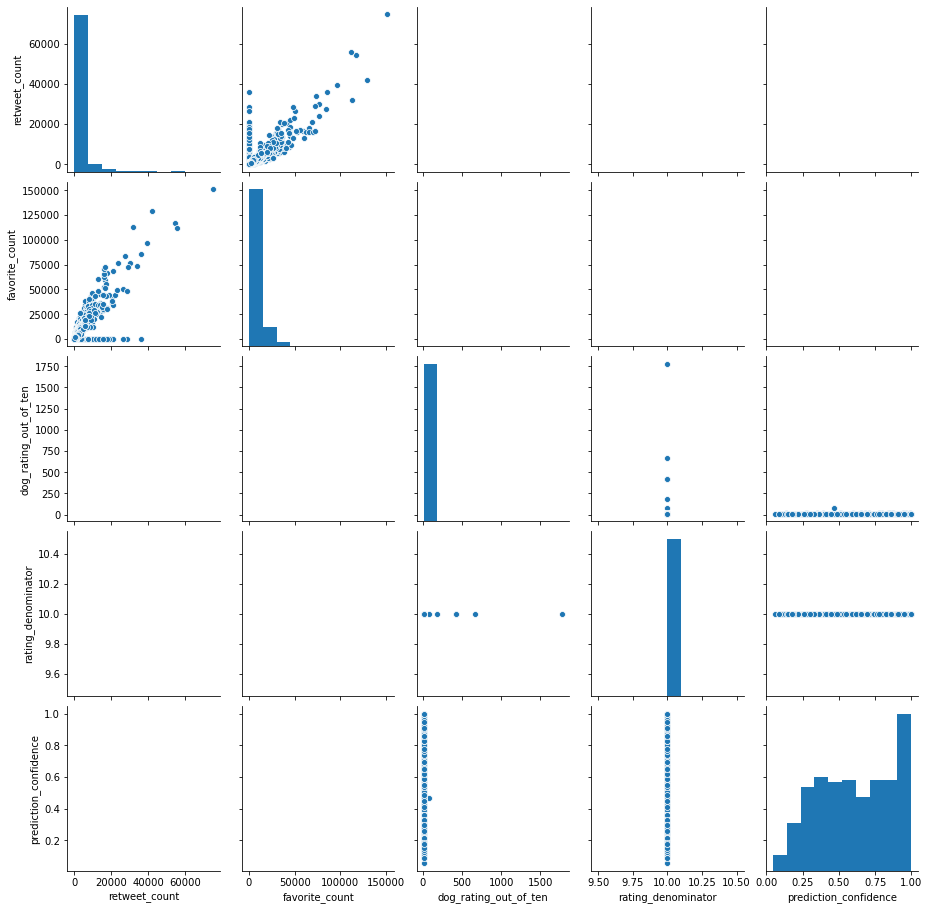

In [99]:
sns_scatterplt = sns.pairplot(master_df_clean)


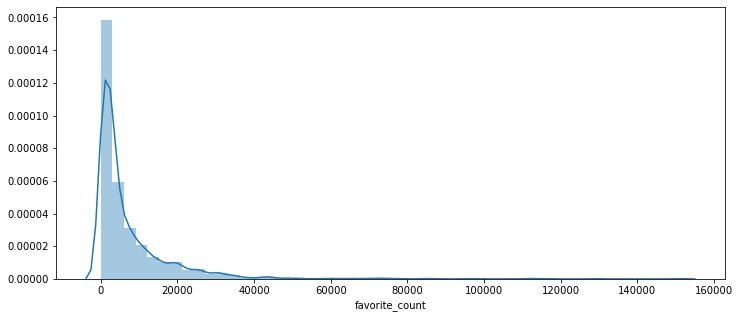

In [100]:
plt.figure(figsize=(12,5))
sns.distplot(master_df_clean.favorite_count);

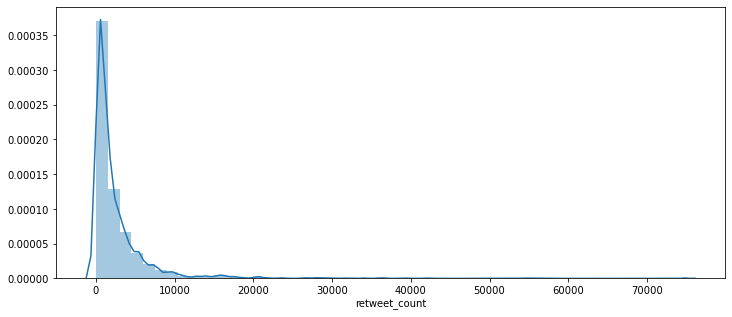

In [101]:
plt.figure(figsize=(12,5))
sns.distplot(master_df_clean.retweet_count);

<li>From correlation table we can see the strong correlation between favorite_count vs. retweet_count

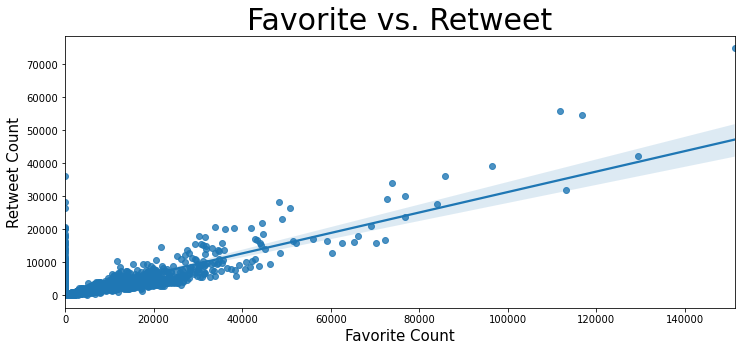

In [102]:
plt.figure(figsize=(12,5))
plt.title("Favorite vs. Retweet", size=30)
sns.regplot(x='favorite_count', y='retweet_count', data=master_df_clean)
plt.ylabel("Retweet Count", size=15)
plt.xlabel("Favorite Count", size=15);

**_3.2.4 Rating vs. Source:_**

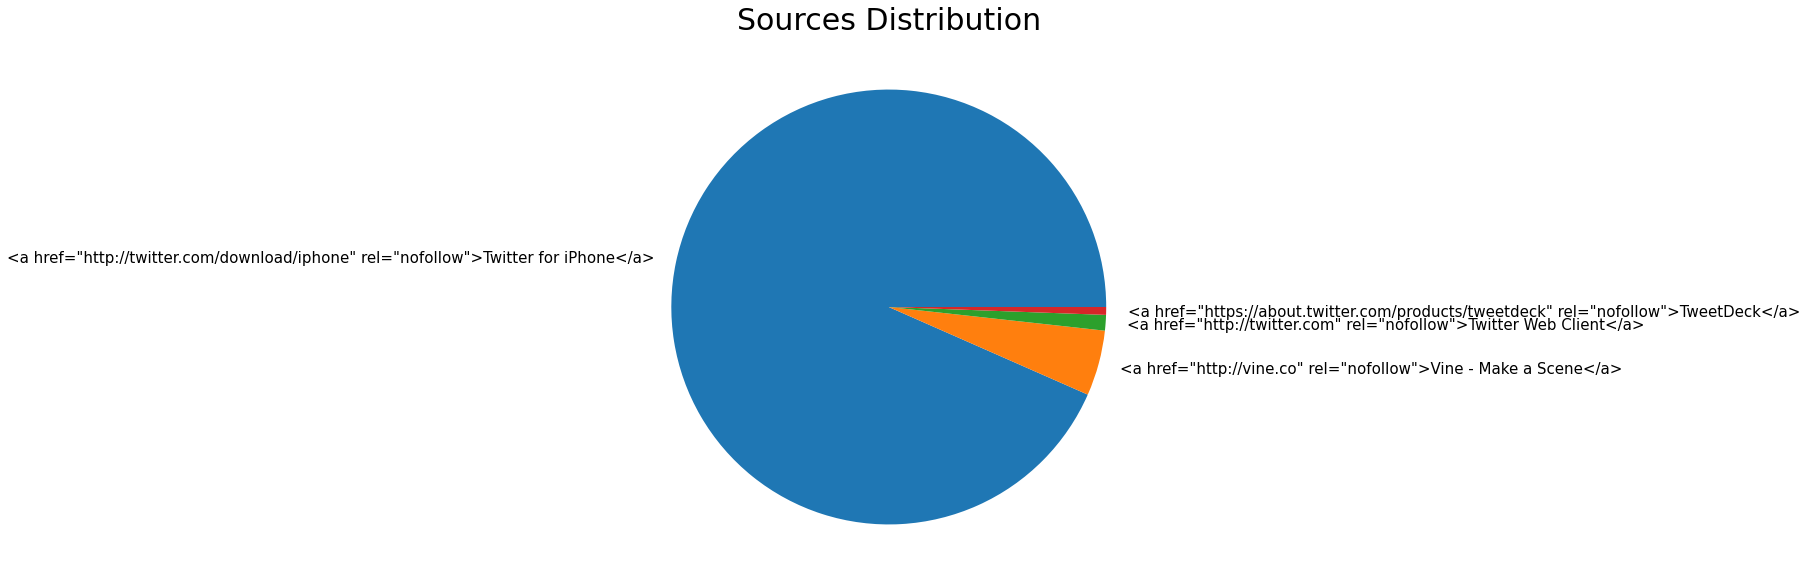

In [106]:
plt.title("Sources Distribution", size=30)
master_df_clean['source'].value_counts().plot(kind='pie',figsize=(10,10),fontsize=15)
plt.ylabel('');

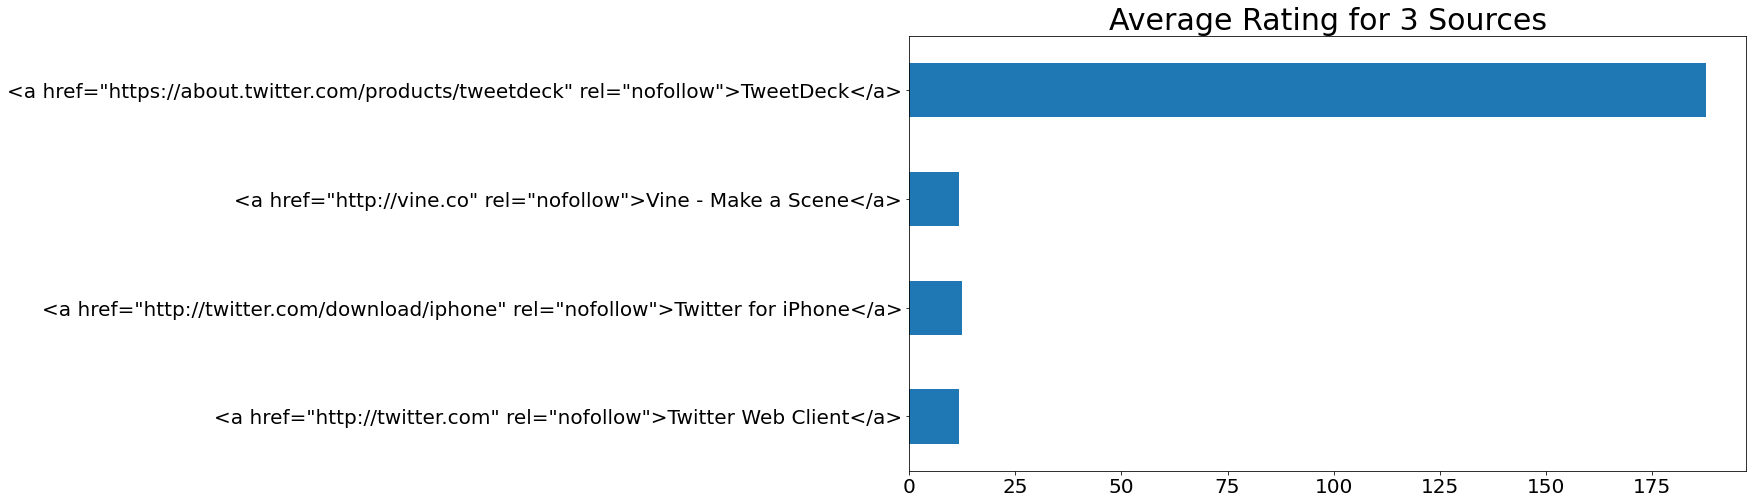

In [107]:
plt.figure(figsize=(15,8))
plt.title("Average Rating for 3 Sources", size=30)
master_df_clean.groupby(['source']).dog_rating_out_of_ten.mean().plot(kind='barh',fontsize=20)
plt.ylabel('', fontsize=20);

# Analyasis

## https://docs.google.com/document/d/1KoFIpCOw9rp9PcoJ0JCXeSuuvt4AwETVEp_FydvSa3c/edit?usp=sharing

# Resources
### - https://github.com/jamesli0512/udacity-dand-project-4
### - https://github.com/S-Tabor/udacity-data-wrangling-project
### - https://github.com/S-Tabor/udacity-data-wrangling-project/blob/master/wrangle_project_final.ipynb
### - https://github.com/jamesli0512/udacity-dand-project-4/blob/master/wrangle_act.ipynb
### -       https://seaborn.pydata.org/introduction.html#:~:text=Seaborn%20is%20a%20library%20for,explore%20and%20understand%20your%20data.
### - https://realpython.com/twitter-bot-python-tweepy/
### - https://pypi.org/project/urlextract/